<a href="https://colab.research.google.com/github/zpenct/Big-Data/blob/main/tes2_doang_tugas_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
aldic = pd.read_csv("Airline Loyalty Data Dictionary.csv")
calendar = pd.read_csv("Calendar.csv")
cusac = pd.read_csv("Airline Loyalty Data Dictionary.csv")
cushis = pd.read_csv("Customer Loyalty History.csv")

In [ ]:
aldic.head()

,Table,Field,Description
0,Customer Flight Activity,Loyalty Number,Customer's unique loyalty number
1,NaN,Year,Year of the period
2,NaN,Month,Month of the period
3,NaN,Total Flights,Sum of Flights Booked (all tickets purchased i...
4,NaN,Distance,Flight distance traveled in the period (km)


In [ ]:
aldic.columns.tolist()

['Table', 'Field', 'Description']

In [ ]:
calendar.head()

,Date,Start of Year,Start of Quarter,Start of Month
0,2012-01-01,2012-01-01,2012-01-01,2012-01-01
1,2012-01-02,2012-01-01,2012-01-01,2012-01-01
2,2012-01-03,2012-01-01,2012-01-01,2012-01-01
3,2012-01-04,2012-01-01,2012-01-01,2012-01-01
4,2012-01-05,2012-01-01,2012-01-01,2012-01-01


In [ ]:
calendar.columns.tolist()

['Date', 'Start of Year', 'Start of Quarter', 'Start of Month']

In [ ]:
cusac.head()

,Table,Field,Description
0,Customer Flight Activity,Loyalty Number,Customer's unique loyalty number
1,NaN,Year,Year of the period
2,NaN,Month,Month of the period
3,NaN,Total Flights,Sum of Flights Booked (all tickets purchased i...
4,NaN,Distance,Flight distance traveled in the period (km)


In [ ]:
cusac.columns.tolist()

['Table', 'Field', 'Description']

In [ ]:
cushis.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [ ]:
cushis.columns.tolist()

['Loyalty Number',
 'Country',
 'Province',
 'City',
 'Postal Code',
 'Gender',
 'Education',
 'Salary',
 'Marital Status',
 'Loyalty Card',
 'CLV',
 'Enrollment Type',
 'Enrollment Year',
 'Enrollment Month',
 'Cancellation Year',
 'Cancellation Month']

In [ ]:
cushis["Churn"] = cushis["Cancellation Year"].notna().astype(int)

In [ ]:
cushis.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Churn
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,0
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,0
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,1
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,0
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,0


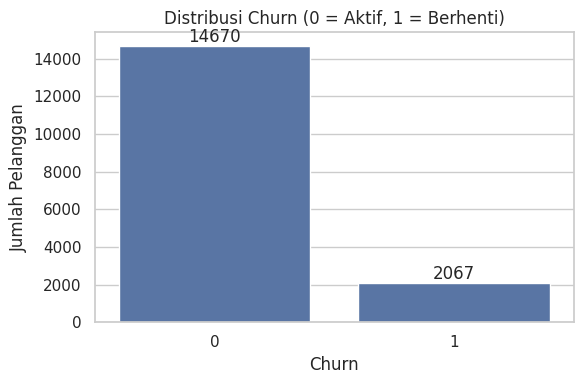

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

churn_distribution = cushis["Churn"].value_counts().rename_axis("Churn").reset_index(name="Count")

churn_distribution["Percentage"] = (churn_distribution["Count"] / churn_distribution["Count"].sum()) * 100

# Visualisasi distribusi churn
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="Churn", y="Count", data=churn_distribution)
ax.bar_label(ax.containers[0])
plt.title("Distribusi Churn (0 = Aktif, 1 = Berhenti)")
plt.xlabel("Churn")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

In [ ]:
cushis.isnull().sum()

,0
Loyalty Number,0
Country,0
Province,0
City,0
Postal Code,0
Gender,0
Education,0
Salary,4238
Marital Status,0
Loyalty Card,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
eda_df = cushis.copy()
eda_df["Churn"] = eda_df["Cancellation Year"].notna().astype(int)

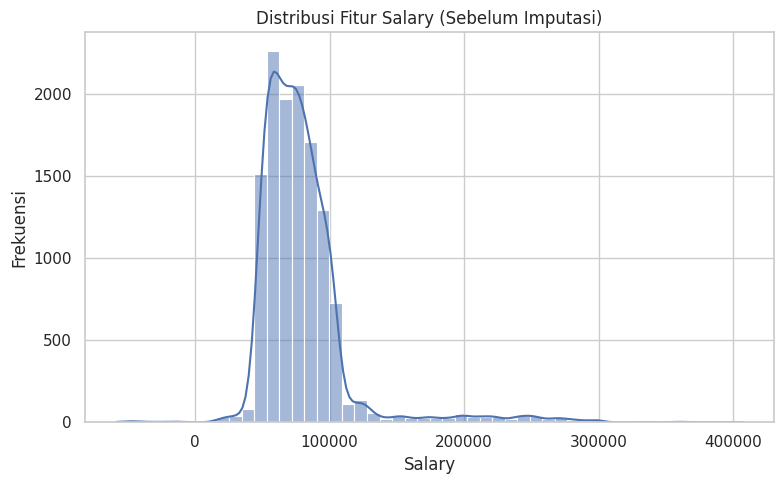

In [ ]:
salary_clean = eda_df["Salary"].dropna()

plt.figure(figsize=(8, 5))
sns.histplot(salary_clean, kde=True, bins=50)
plt.title("Distribusi Fitur Salary (Sebelum Imputasi)")
plt.xlabel("Salary")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

In [ ]:
median_salary = eda_df["Salary"].median()
eda_df["Salary"] = eda_df["Salary"].fillna(median_salary)

In [ ]:
eda_df.isnull().sum()

,0
Loyalty Number,0
Country,0
Province,0
City,0
Postal Code,0
Gender,0
Education,0
Salary,0
Marital Status,0
Loyalty Card,0


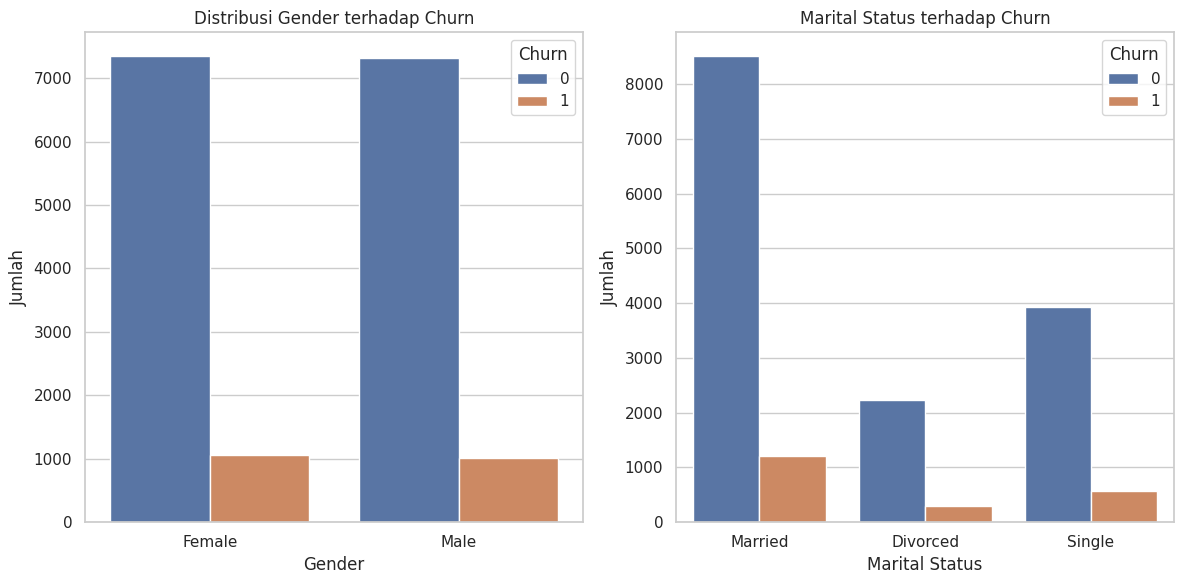

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.countplot(data=eda_df, x="Gender", hue="Churn")
plt.title("Distribusi Gender terhadap Churn")
plt.xlabel("Gender")
plt.ylabel("Jumlah")

plt.subplot(1, 2, 2)
sns.countplot(data=eda_df, x="Marital Status", hue="Churn")
plt.title("Marital Status terhadap Churn")
plt.xlabel("Marital Status")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()


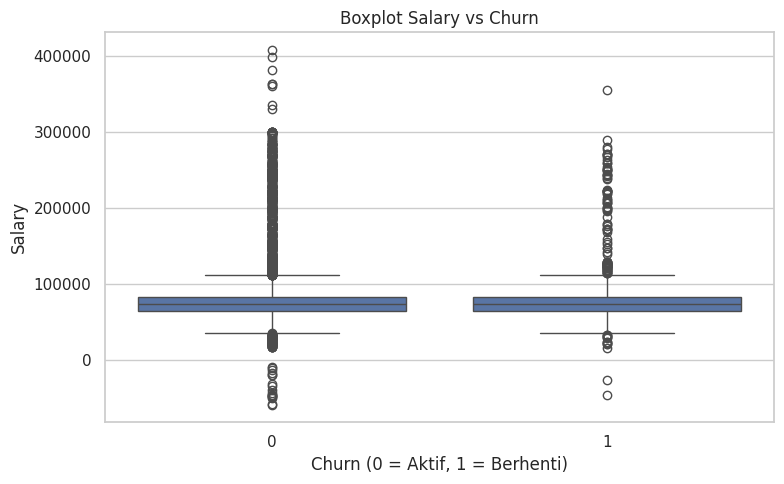

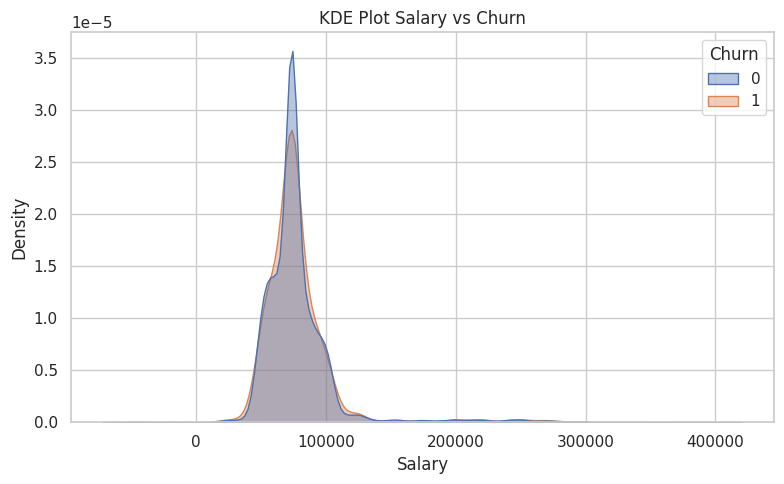

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=eda_df, x="Churn", y="Salary")
plt.title("Boxplot Salary vs Churn")
plt.xlabel("Churn (0 = Aktif, 1 = Berhenti)")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=eda_df, x="Salary", hue="Churn", fill=True, common_norm=False, alpha=0.4)
plt.title("KDE Plot Salary vs Churn")
plt.xlabel("Salary")
plt.tight_layout()
plt.show()

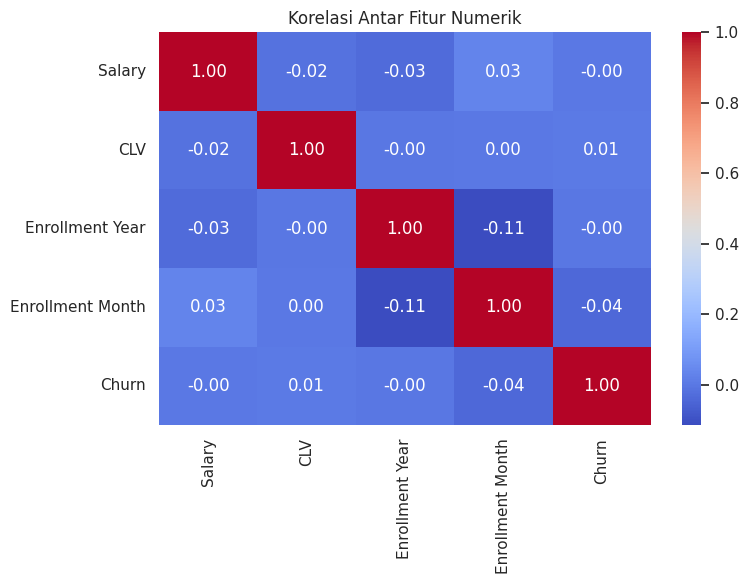

In [ ]:
numeric_cols = ["Salary", "CLV", "Enrollment Year", "Enrollment Month", "Churn"]
plt.figure(figsize=(8, 6))
sns.heatmap(eda_df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.tight_layout()
plt.show()

In [ ]:
median_salary = cushis["Salary"].median()
cushis["Salary"] = cushis["Salary"].fillna(median_salary)

In [ ]:
cushis.isnull().sum()

,0
Loyalty Number,0
Country,0
Province,0
City,0
Postal Code,0
Gender,0
Education,0
Salary,0
Marital Status,0
Loyalty Card,0


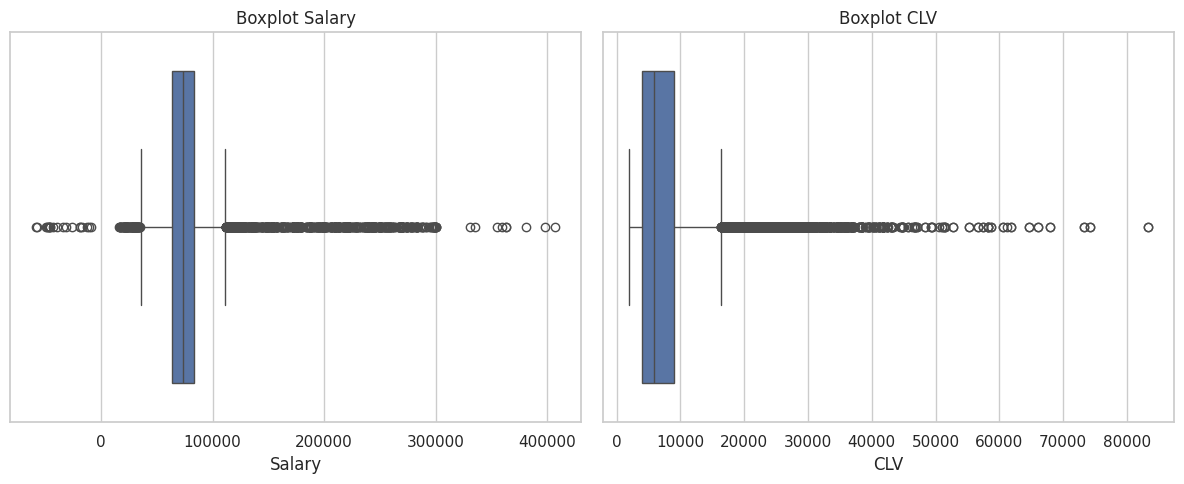

In [ ]:
# Salin data EDA untuk analisis outlier
outlier_df = cushis.copy()

# Visualisasi boxplot Salary dan CLV
plt.figure(figsize=(12, 5))

# Boxplot Salary
plt.subplot(1, 2, 1)
sns.boxplot(x=outlier_df["Salary"])
plt.title("Boxplot Salary")

# Boxplot CLV
plt.subplot(1, 2, 2)
sns.boxplot(x=outlier_df["CLV"])
plt.title("Boxplot CLV")

plt.tight_layout()
plt.show()

# Hitung outlier dengan metode IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Buang outlier dari Salary dan CLV
clean_df = remove_outliers_iqr(outlier_df, "Salary")
clean_df = remove_outliers_iqr(clean_df, "CLV")

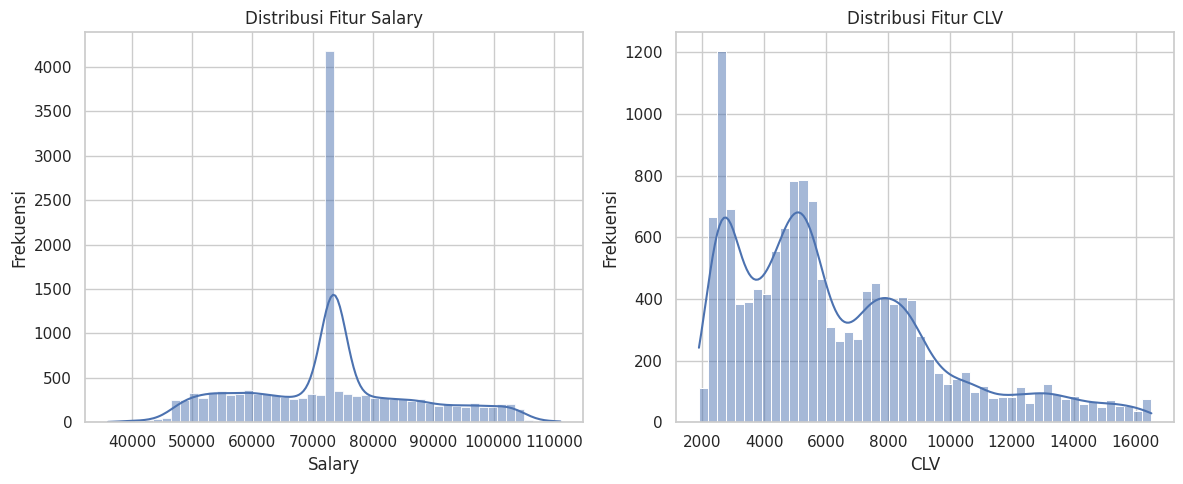

In [ ]:
sal = clean_df["Salary"]
clv = clean_df["CLV"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(sal, kde=True, bins=50)
plt.title("Distribusi Fitur Salary")
plt.xlabel("Salary")
plt.ylabel("Frekuensi")
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.histplot(clv, kde=True, bins=50)
plt.title("Distribusi Fitur CLV")
plt.xlabel("CLV")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_df = clean_df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

model_df = scaled_df.copy()

drop_cols = [
    "Loyalty Number", "Country", "Province", "City", "Postal Code",
    "Cancellation Year", "Cancellation Month","Enrollment Month"
]
model_df.drop(columns=drop_cols, inplace=True)

# Create Years Active
model_df["Years Active"] = 2025 - model_df["Enrollment Year"]
model_df.drop(columns=["Enrollment Year"], inplace=True)

categorical_cols = ["Gender", "Education", "Marital Status", "Loyalty Card", "Enrollment Type"]

for col in categorical_cols:
    model_df[col] = LabelEncoder().fit_transform(model_df[col])

X_final = model_df.drop(columns=["Churn"])
y_final = model_df["Churn"]

In [ ]:
numeric_features = ["Salary", "CLV","Years Active"]

scaler = StandardScaler()
model_df[numeric_features] = scaler.fit_transform(model_df[numeric_features])

model_df[numeric_features].describe()

,Salary,CLV,Years Active
count,1.447600e+04,1.447600e+04,1.447600e+04
mean,-2.022269e-16,1.570694e-16,2.012452e-17
std,1.000035e+00,1.000035e+00,1.000035e+00
min,-2.620082e+00,-1.349219e+00,-1.394729e+00
25%,-6.757977e-01,-7.791552e-01,-8.885340e-01
50%,3.114714e-02,-2.514859e-01,1.238563e-01
75%,5.107977e-01,5.708104e-01,6.300514e-01
max,2.698600e+00,3.108705e+00,1.642442e+00


In [ ]:
model_df

,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Churn,Years Active
0,0,0,0.724100,1,2,-0.756801,1,0,-0.382339
1,1,1,0.031147,0,2,-0.756658,1,0,-0.382339
2,1,1,0.031147,2,2,-0.756615,1,1,0.630051
3,1,1,0.031147,2,2,-0.756615,1,0,1.136247
4,1,0,2.159385,1,2,-0.755687,1,0,0.630051
...,...,...,...,...,...,...,...,...,...
16655,1,0,0.663667,0,1,0.432687,0,0,-1.394729
16673,0,0,0.048150,1,1,0.729020,0,1,-1.394729
16676,0,0,0.073230,0,1,2.041840,0,1,-1.394729
16698,0,0,-1.307007,1,2,-0.170872,0,0,-1.394729


In [ ]:
X_final

,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Years Active
0,0,0,83236.0,1,2,3839.14,1,9
1,1,1,73455.0,0,2,3839.61,1,9
2,1,1,73455.0,2,2,3839.75,1,11
3,1,1,73455.0,2,2,3839.75,1,12
4,1,0,103495.0,1,2,3842.79,1,11
...,...,...,...,...,...,...,...,...
16655,1,0,82383.0,0,1,7736.65,0,7
16673,0,0,73695.0,1,1,8707.62,0,7
16676,0,0,74049.0,0,1,13009.24,0,7
16698,0,0,54567.0,1,2,5759.01,0,7


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Siapkan model
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Simpan hasil evaluasi
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

# Format hasil
pd.DataFrame(
    {k: {"Accuracy": v["Accuracy"], "F1 Score": v["F1 Score"]} for k, v in results.items()}
).T.round(4)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,F1 Score
Decision Tree,0.7780,0.1483
Random Forest,0.8439,0.0504
Naive Bayes,0.8750,0.0000
Gradient Boosting,0.8747,0.0000


Datanya imbalance, mau coba2 hasilnya klo datanya di ubah sedikit labeih balance pake SMOTE

In [ ]:
!pip install imbalanced-learn

Distribusi label setelah SMOTE: Counter({0: 10168, 1: 10168})


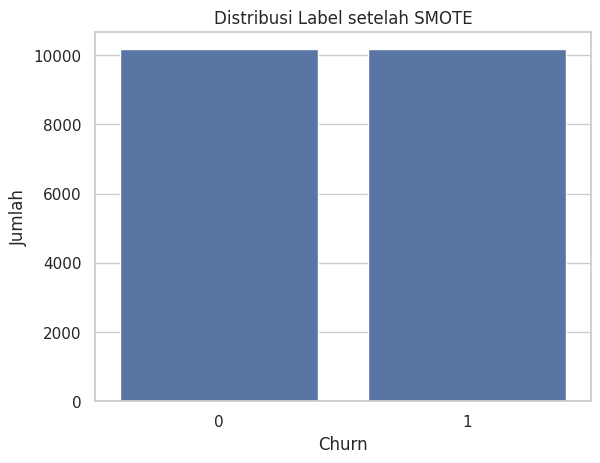

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

counter = Counter(y_train_smote)
print("Distribusi label setelah SMOTE:", counter)

# Visualisasi
sns.countplot(x=y_train_smote)
plt.title("Distribusi Label setelah SMOTE")
plt.xlabel("Churn")
plt.ylabel("Jumlah")
plt.show()


In [ ]:
models = {
    "Decision Tree (SMOTE)": DecisionTreeClassifier(random_state=42),
    "Random Forest (SMOTE)": RandomForestClassifier(random_state=42),
    "Naive Bayes (SMOTE)": GaussianNB(),
    "Gradient Boosting (SMOTE)": GradientBoostingClassifier(random_state=42)
}

results_smote = {}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    results_smote[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

pd.DataFrame(
    {k: {"Accuracy": v["Accuracy"], "F1 Score": v["F1 Score"]} for k, v in results_smote.items()}
).T.round(4)

,Accuracy,F1 Score
Decision Tree (SMOTE),0.7151,0.1675
Random Forest (SMOTE),0.7272,0.1736
Naive Bayes (SMOTE),0.5984,0.2344
Gradient Boosting (SMOTE),0.6430,0.2190
